<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_12/class_12_video_005_load_and_get_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import feature
import numpy as np

In [2]:
!gdown 1mx3LUdeFO1-KFzClhFVwu71KWM3-s1hO

Downloading...
From: https://drive.google.com/uc?id=1mx3LUdeFO1-KFzClhFVwu71KWM3-s1hO
To: /content/strawberry.mp4
100% 7.87M/7.87M [00:00<00:00, 102MB/s]


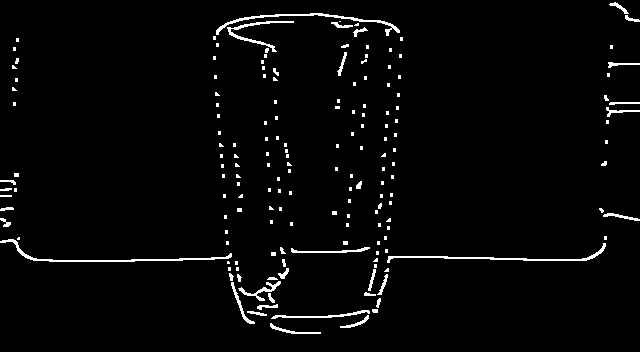

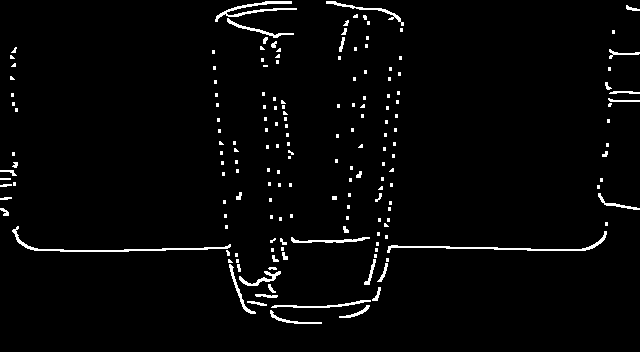

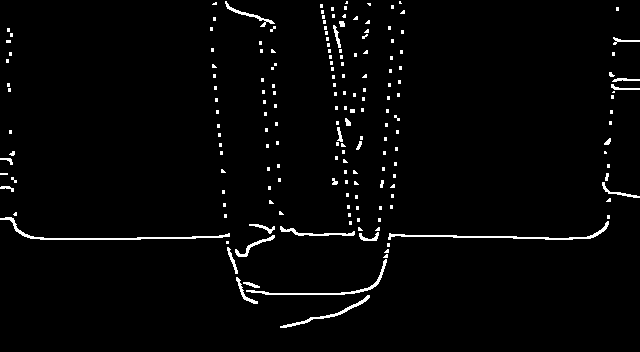

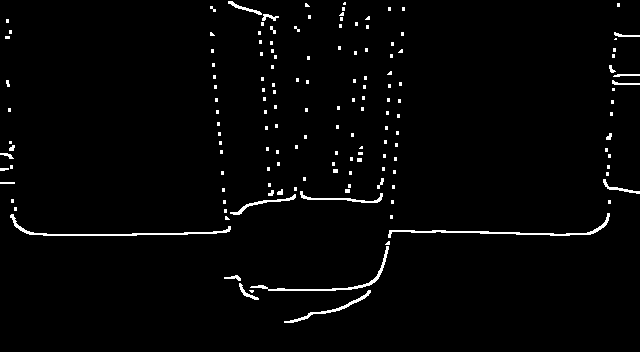

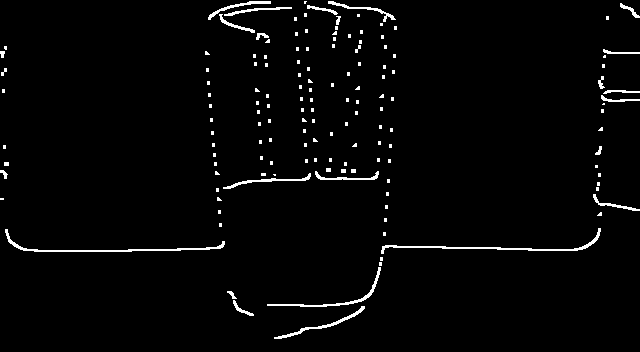

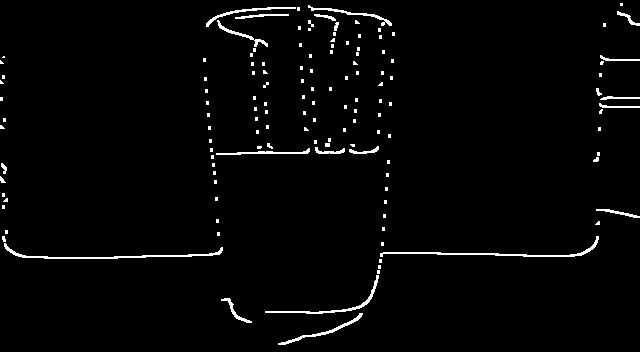

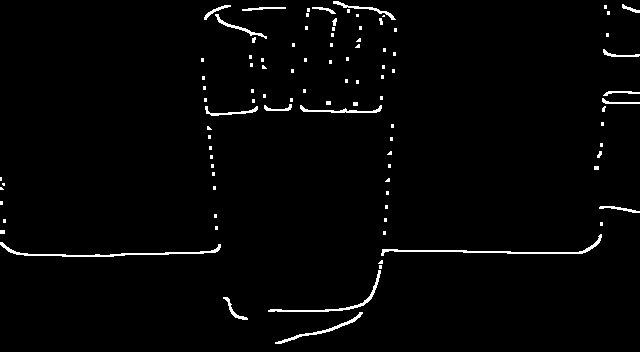

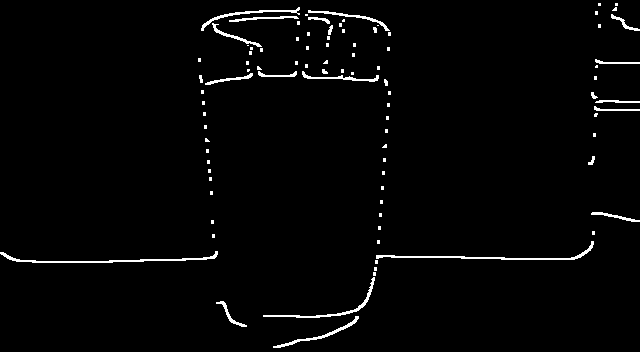

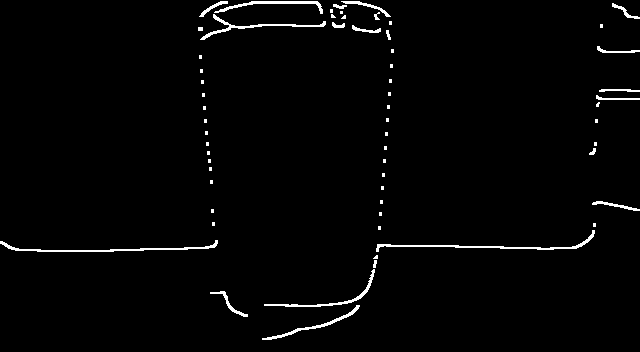

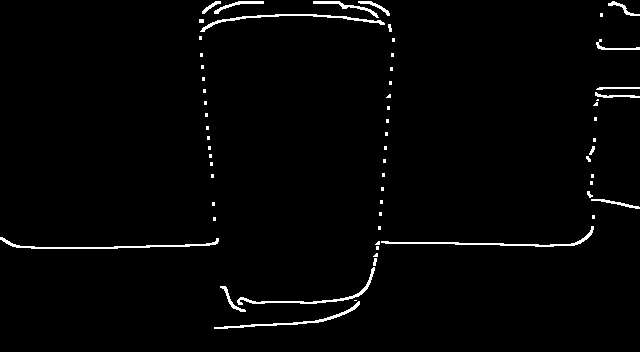

In [3]:
name_video = 'strawberry.mp4'
cap = cv2.VideoCapture(name_video)
cont = 0 
filtro =  100
if cap.isOpened() == False:
  print('video not found')

k = 0
images=[]

while cap.isOpened():
  cont = cont + 1
  ret,frame =cap.read()

  if ret == True:
    if(cont % filtro == 0):
      
      images.append(frame)
      k += 1
      gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      edges = feature.canny(gray, sigma=3)
      nrows,ncols =edges.shape
      Foto = np.ones((nrows,ncols))*255
      for i in range(nrows):
        for j in range(ncols):
          if edges[i,j] == True:
            Foto[i,j]=0
      sobely = cv2.Sobel(Foto,cv2.CV_64F,0,1,ksize=5)  # y
      cv2_imshow(sobely)

      
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  else:
    break


cap.release()
cv2.destroyAllWindows()